<a href="https://colab.research.google.com/github/mariap13/CMSC320-FinalProject/blob/main/CMSC320_Final_Project_MP_KRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Baltimore City Crime Data
## Data Preprocessing

For this project we will be pulling data from the Open Data Baltimore API, specifically the major crime dataset featured in the link below, and loading it into a dataframe for further analysis.<br /> https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about <br> **Please download the CSV file under download. (file is too large to place in repo)**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
crime_data = pd.read_csv('/content/Part1_Crime_Beta_5307206680000182585.csv')
pd.options.display.max_columns = None
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77143 entries, 0 to 77142
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowID            77143 non-null  int64  
 1   CCNumber         77143 non-null  object 
 2   CrimeDateTime    77143 non-null  object 
 3   CrimeCode        77143 non-null  object 
 4   Description      77143 non-null  object 
 5   Inside_Outside   0 non-null      float64
 6   Weapon           12685 non-null  object 
 7   Post             75946 non-null  float64
 8   Gender           66904 non-null  object 
 9   Age              61997 non-null  float64
 10  Race             77142 non-null  object 
 11  Ethnicity        6 non-null      object 
 12  Location         76840 non-null  object 
 13  Old_District     75946 non-null  object 
 14  New_District     0 non-null      float64
 15  Neighborhood     75926 non-null  object 
 16  Latitude         76843 non-null  float64
 17  Longitude   

In [ ]:
pd.options.display.max_columns = None
crime_data.tail()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
77138,77139,12K01745,11/4/2012 4:00:00 PM,5A,BURGLARY,NaN,NaN,132.0,F,30.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1500 EUTAW PL,CENTRAL,NaN,MADISON PARK,39.305783,-76.628978,"(39.305782623530106,-76.628977808366614)",APT/CONDO - OCCUPIED,1.0,-76.628978,39.305783
77139,77140,12J13520,10/30/2012 12:00:00 PM,6D,LARCENY FROM AUTO,NaN,NaN,221.0,M,52.0,UNKNOWN,NaN,2900 PULASKI HWY,SOUTHEAST,NaN,ELLWOOD PARK/MONUMENT,39.295281,-76.575959,"(39.29528131239082,-76.575958991294783)",STREET,1.0,-76.575959,39.295281
77140,77141,12J13744,10/30/2012 8:37:00 PM,3CF,ROBBERY - COMMERCIAL,NaN,FIREARM,424.0,NaN,NaN,UNKNOWN,NaN,6100 HARFORD RD,NORTHEAST,NaN,WESTFIELD,39.358410,-76.555797,"(39.358409819017901,-76.555796834807836)",WHOLESALE/DISC. STOR,1.0,-76.555797,39.358410
77141,77142,12J13460,10/30/2012 8:20:00 AM,6D,LARCENY FROM AUTO,NaN,NaN,533.0,M,26.0,WHITE,NaN,2000 SULGRAVE AVE,NORTHERN,NaN,MOUNT WASHINGTON,39.364031,-76.659118,"(39.364030712216149,-76.659118011096695)",PARKING LOT-OUTSIDE,1.0,-76.659118,39.364031
77142,77143,12J11388,10/30/2012 10:00:00 PM,6C,LARCENY,NaN,NaN,213.0,NaN,NaN,UNKNOWN,NaN,1800 THAMES ST,SOUTHEAST,NaN,FELLS POINT,39.281822,NaN,NaN,NaN,NaN,NaN,NaN


### Description of the Crime Data columns:
*   `RowID` - The unique ID for each entry in the dataset
*   `CCNumber` -
*   `CrimeCode` - The police Crime Code assigned to the crime
*   `Description` - The type of crime that was committed
*   `Inside_Outside` - Describes whether the crime occured indoors or outdoors
*   `Weapon` - Described what weapon was used, if any, in the crime
*   `Post` - The police post area the crime occured in
*   `Gender` - The gender ('Female', 'Male', 'Undefined') of the perpetrator
*   `Age` - The age of the perpetrator
*   `Race` - The race of the perpetrator
*   `Ethnicity` - The ethnicity of the perpetrator
*   `Location` - The address of the crime
*   `Old_District` - The district where the crime occured, according to the system used by Baltimore city before July 2023
*   `New_District` - The district where the crime occured, according to the system used by Baltimore city after July 2023
*   `Neighborhood` - The neighborhood where the crime occured
*   `Latitude` - Latitude coordinate of the crime location
*   `Longitude` - Longitude coordinate of the crime location
*   `GeoLocation` - Coordinates of the crime location to be used by ArcGIS
*   `PremiseType` - Brief description of the setting where the crime occured, for example, "Convenience store"
*   `Total_Incidents` - The number of incidents covered by the entry (this is '1' for every entry)




## Data Parsing
In order to avoid errors with future calculations/manipulations, the'CrimeDateTime' column was converted to datetime, and dates that were set to NaN due to being out of range (ex/a crime that happened in 1557) were removed. The column was then separated into a 'Date' column and a 'Time' column.<br /><br />The 'Age' column was set to integers from float values, and the frequencies of all unique ages in the column were printed to display the distribution of ages.  Later on we removed the outliers from the 'Age' column.<br /><br />
Since the Baltimore Police Department started using a new District system in July 2023, the majority of the dataset uses the old system and the 'New_District' column is empty for all events before July 2023.  We removed null values in the 'Old_District' column, then used the mode Old_District for a neighborhood to fill in null New_District values for crime events in each neighborhood.**(just use new_district for imputation instead ??)**<br />


In [ ]:
crime_data.Age = crime_data.Age.convert_dtypes(convert_integer=True)
crime_data.Age = crime_data.Age.abs()
print(crime_data.Age.value_counts().sort_index())

Age
0       35
1       25
2       39
3       12
4       35
        ..
124      1
152      1
194      1
436      1
8251     1
Name: count, Length: 109, dtype: Int64


In [ ]:
crime_data.CrimeDateTime = pd.to_datetime(crime_data.CrimeDateTime, errors='coerce', format='mixed')
crime_data.dropna(axis=0, subset=['CrimeDateTime'], inplace=True)
print("Null 'CrimeDateTime' values:", str(crime_data.CrimeDateTime.isna().sum()))
crime_data['Date'] = [d.date() for d in crime_data['CrimeDateTime']]
crime_data['Time'] = [d.time() for d in crime_data['CrimeDateTime']]
print(crime_data['Date'])
print(crime_data['Time'])

Null 'CrimeDateTime' values: 0
0        2015-06-27
1        2015-06-27
2        2015-06-27
3        2015-06-27
4        2015-06-27
            ...    
77138    2012-11-04
77139    2012-10-30
77140    2012-10-30
77141    2012-10-30
77142    2012-10-30
Name: Date, Length: 77143, dtype: object
0        03:00:00
1        22:45:00
2        02:00:00
3        18:29:00
4        23:30:00
           ...   
77138    16:00:00
77139    12:00:00
77140    20:37:00
77141    08:20:00
77142    22:00:00
Name: Time, Length: 77143, dtype: object


In [ ]:
import datetime
#crime_data.dropna(axis=0, subset=['Old_District'], inplace=True)
temp = crime_data[crime_data['Date']<datetime.date(2023, 7, 1)]
temp.dropna(subset=["Old_District"], inplace=True)
temp.tail()
#nd_per_nb = crime_data.groupby('Neighborhood')['New_District'].agg(lambda x: np.nan if pd.isna(x).all() else x.value_counts().idxmax())
#od_per_nb = crime_data.groupby('Neighborhood')['Old_District'].agg(lambda x: np.nan if pd.isna(x).all() else x.value_counts().idxmax()).to_dict()
#for each nan value in nd_per_nb['New_District'], replace it with the mode district in od_per_nb
#nd_per_nb = nd_per_nb.apply(lambda x: od_per_nb['Old_District'] if pd.isnull(x['New_District']) else x['New_District'])

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y,Date,Time
77138,77139,12K01745,2012-11-04 16:00:00,5A,BURGLARY,NaN,NaN,132.0,F,30,BLACK_OR_AFRICAN_AMERICAN,NaN,1500 EUTAW PL,CENTRAL,NaN,MADISON PARK,39.305783,-76.628978,"(39.305782623530106,-76.628977808366614)",APT/CONDO - OCCUPIED,1.0,-76.628978,39.305783,2012-11-04,16:00:00
77139,77140,12J13520,2012-10-30 12:00:00,6D,LARCENY FROM AUTO,NaN,NaN,221.0,M,52,UNKNOWN,NaN,2900 PULASKI HWY,SOUTHEAST,NaN,ELLWOOD PARK/MONUMENT,39.295281,-76.575959,"(39.29528131239082,-76.575958991294783)",STREET,1.0,-76.575959,39.295281,2012-10-30,12:00:00
77140,77141,12J13744,2012-10-30 20:37:00,3CF,ROBBERY - COMMERCIAL,NaN,FIREARM,424.0,NaN,<NA>,UNKNOWN,NaN,6100 HARFORD RD,NORTHEAST,NaN,WESTFIELD,39.358410,-76.555797,"(39.358409819017901,-76.555796834807836)",WHOLESALE/DISC. STOR,1.0,-76.555797,39.358410,2012-10-30,20:37:00
77141,77142,12J13460,2012-10-30 08:20:00,6D,LARCENY FROM AUTO,NaN,NaN,533.0,M,26,WHITE,NaN,2000 SULGRAVE AVE,NORTHERN,NaN,MOUNT WASHINGTON,39.364031,-76.659118,"(39.364030712216149,-76.659118011096695)",PARKING LOT-OUTSIDE,1.0,-76.659118,39.364031,2012-10-30,08:20:00
77142,77143,12J11388,2012-10-30 22:00:00,6C,LARCENY,NaN,NaN,213.0,NaN,<NA>,UNKNOWN,NaN,1800 THAMES ST,SOUTHEAST,NaN,FELLS POINT,39.281822,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-30,22:00:00


##Data Exploration and Summary Statistics
Once we cleaned features of the crime data, we examined trends within and across these features.


In [ ]:
#for (col_name, col_data) in crime_data.items():
#  print("Unique values in", col_name, ": \t", col_data.unique())
col_names = ["Description", "Weapon", "Age", "Race", "Ethnicity", "Neighborhood", "PremiseType"]
for i in col_names:
  print("Frequency of unique values in: ", crime_data[i].value_counts())

Frequency of unique values in:  Description
LARCENY                 18821
COMMON ASSAULT          13381
BURGLARY                12422
LARCENY FROM AUTO       11032
AGG. ASSAULT             7247
AUTO THEFT               6166
ROBBERY                  5969
RAPE                      475
ROBBERY - COMMERCIAL      468
ARSON                     391
HOMICIDE                  373
ROBBERY - CARJACKING      246
SHOOTING                  152
Name: count, dtype: int64
Frequency of unique values in:  Weapon
FIREARM         4793
OTHER           3802
KNIFE           2684
HANDS           1010
FIRE             391
PERSONAL_WEA       5
Name: count, dtype: int64
Frequency of unique values in:  Age
26      2048
25      1953
24      1939
27      1917
28      1864
        ... 
103        1
8251       1
436        1
101        1
113        1
Name: count, Length: 109, dtype: Int64
Frequency of unique values in:  Race
BLACK_OR_AFRICAN_AMERICAN           41009
WHITE                               19041
UNKNOWN   

###Detecting outliers in the data
Creating a box plot for the 'Age' column revealed that ages higher than 80 are considered outliers. Once this was discovered, we removed the outliers from the 'Age' column.<br />


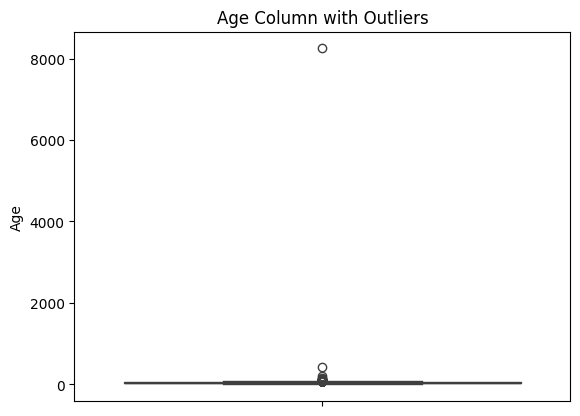

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(crime_data['Age'])
plt.title(f'Age Column with Outliers')
plt.show()

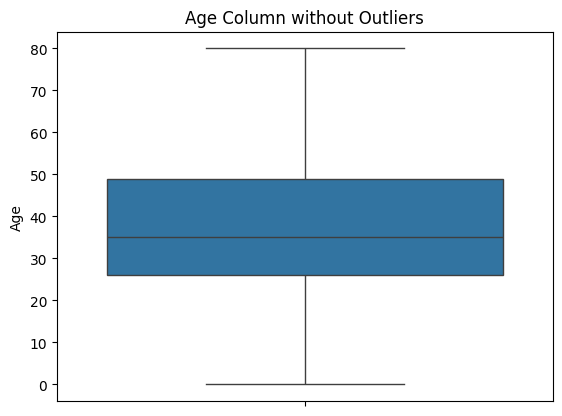

In [ ]:
removed_outliers = crime_data[crime_data['Age'] <= 80]
sns.boxplot(removed_outliers['Age'])
plt.title(f'Age Column without Outliers')
plt.show()
index_names = crime_data[crime_data['Age'] > 80].index
crime_data.drop(index_names, inplace=True)#drop outlier ages from the dataset

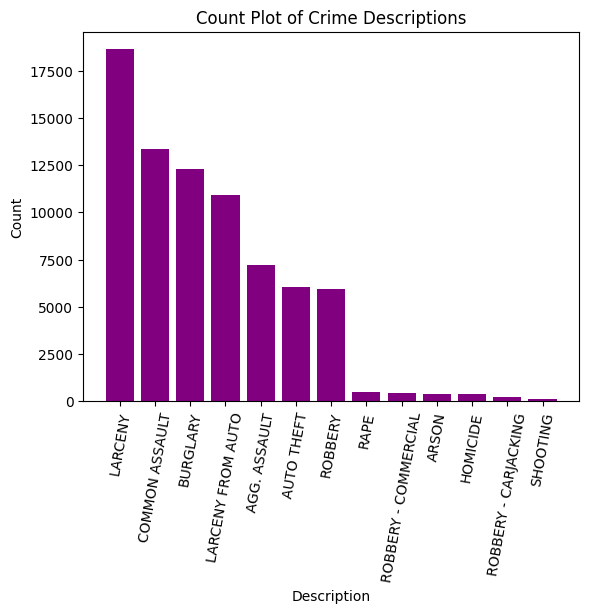

In [ ]:
descrip_counts = crime_data['Description'].value_counts()

plt.bar(descrip_counts.index, descrip_counts, color='purple')
plt.title('Count Plot of Crime Descriptions')
plt.xlabel('Description')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.show()

###Hypothesis Test 1:
**Null Hypothesis:** The district where a crime was committed will have an impact of the likelihood of the nature (description) of the crime.<br />
**Alternate Hypothesis:** The district where a crime was committed will not have an impact of the likelihood of the nature (description) of the crime.<br />
For this test we used a Chi-Squared test, since both variables are categorical.

In [ ]:
#Columns: district, description
contingency = pd.crosstab(crime_data.Old_District, crime_data.Description)
contingency

Description,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,SHOOTING
Old_District,,,,,,,,,,,,,
CENTRAL,642,25,411,730,1538,28,3017,1891,55,760,25,50,10
EASTERN,832,36,397,928,1548,53,1275,743,47,430,20,36,29
NORTHEAST,976,73,1125,2380,2044,50,2688,1457,67,912,33,77,16
NORTHERN,599,32,627,1689,1115,35,2292,1539,47,652,25,65,11
NORTHWEST,739,36,760,1446,1198,50,1694,849,57,647,38,61,11
SOUTHEAST,931,26,622,1453,1911,22,2775,1958,56,882,20,55,9
SOUTHERN,797,48,651,1383,1458,32,2181,1049,51,547,17,43,14
SOUTHWEST,733,64,732,1321,1071,45,1282,683,39,467,34,49,25
WESTERN,854,38,643,856,1314,55,1169,492,45,499,25,31,27


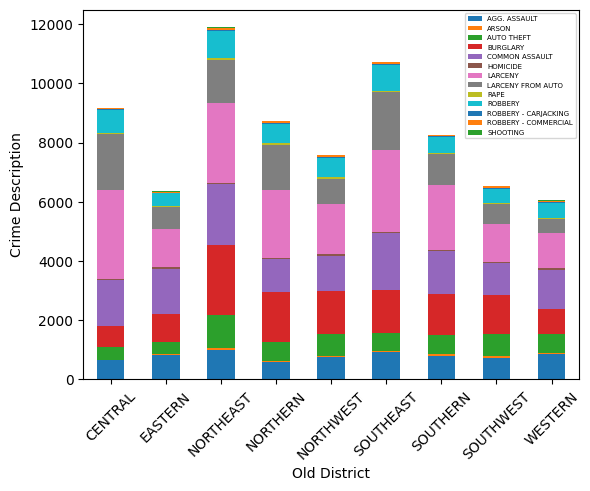

In [ ]:
plt = contingency.plot.bar(rot=45, xlabel="Old District", ylabel="Crime Description", stacked=True).legend(prop={'size': 5})

In [ ]:
import scipy.stats as stats
chi2_res = stats.chi2_contingency(contingency)
chi2_res.pvalue

0.0

Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. District does not have a significant impact on the likelihood that a type of crime will occur.<br /><br />
###Hypothesis Test 2: ANOVA
**Null Hypothesis:** The description of the crime and the weapon used do not significantly impact one another.<br />
**Alternate Hypothesis:** The description of the crime and the weapon used do significantly impact one another.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Group by 'Description' and 'Weapon'
grouped_description_weapon = crime_data.groupby(['Description', 'Weapon']).size().reset_index(name='Count')
print(grouped_description_weapon)

             Description        Weapon  Count
0           AGG. ASSAULT       FIREARM   1323
1           AGG. ASSAULT         HANDS   1009
2           AGG. ASSAULT         KNIFE   2008
3           AGG. ASSAULT         OTHER   2902
4                  ARSON          FIRE    388
5         COMMON ASSAULT  PERSONAL_WEA      3
6               HOMICIDE       FIREARM    308
7               HOMICIDE         KNIFE     35
8               HOMICIDE         OTHER     30
9                   RAPE         OTHER    472
10                  RAPE  PERSONAL_WEA      2
11               ROBBERY       FIREARM   2511
12               ROBBERY         KNIFE    567
13               ROBBERY         OTHER    365
14  ROBBERY - CARJACKING       FIREARM    164
15  ROBBERY - CARJACKING         KNIFE     24
16  ROBBERY - CARJACKING         OTHER      5
17  ROBBERY - COMMERCIAL       FIREARM    324
18  ROBBERY - COMMERCIAL         KNIFE     45
19  ROBBERY - COMMERCIAL         OTHER     25
20              SHOOTING       FIR

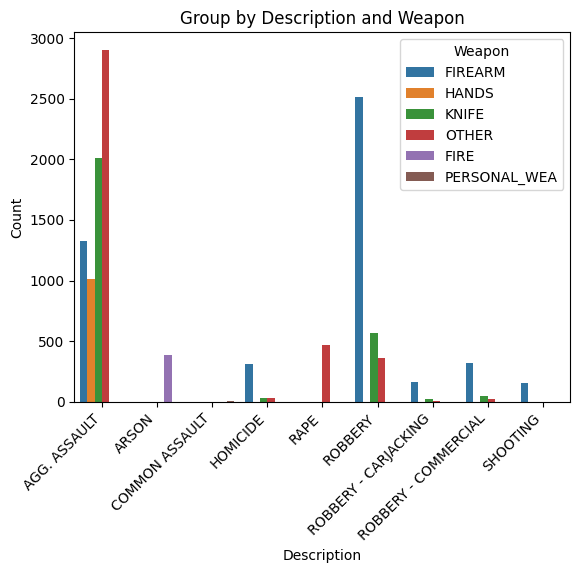

In [ ]:
sns.barplot(x='Description', y='Count', hue='Weapon', data=grouped_description_weapon)

plt.title('Group by Description and Weapon')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [ ]:
anova_data = [group['Count'].values for name, group in grouped_description_weapon.groupby('Description')]

#ANOVA
f_statistic, p_value = stats.f_oneway(*anova_data)

print("P-value:", p_value)

P-value: 0.04931400558647498


In [ ]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. Therefore, The description of the crime and the weapon used do significantly impact one another.

###Hypothesis Test 3: T-Test
T-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is used when you have a smaller sample size (typically n < 30) or when you don't know the population standard deviation (σ) and must estimate it from the sample.

**Null Hypothesis:**  There is no difference in the average age of male and female perpetrators. <br>
**Alternate Hypothesis:** There is a difference in the average age of male and female perpetrators.

In [ ]:
male_ages = crime_data[(crime_data['Gender'] == 'M')  & (crime_data['Age'].notna())]['Age']
female_ages = crime_data[(crime_data['Gender'] == 'F')  & (crime_data['Age'].notna())]['Age']
print(male_ages)
print(female_ages)

# t-test
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)  # Use equal_var=False for Welch's t-test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

2        43
8        57
9        46
10       44
16       30
         ..
77134    25
77136    49
77137    34
77139    52
77141    26
Name: Age, Length: 28892, dtype: Int64
1        30
7        46
11       24
12       39
13       54
         ..
77128    24
77129    23
77130    50
77135    27
77138    30
Name: Age, Length: 32391, dtype: Int64
T-statistic: 17.944090043997168
P-value: 8.272763331742276e-72


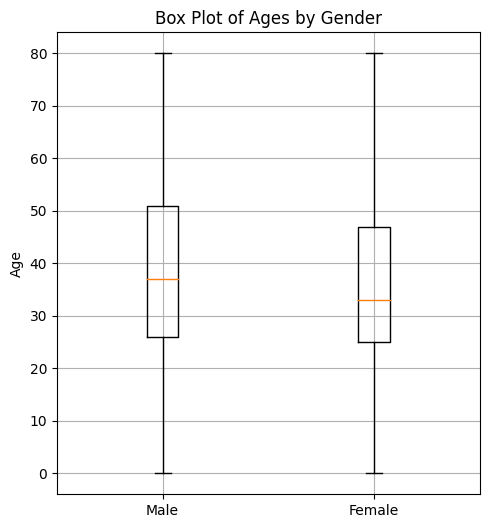

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([male_ages, female_ages], labels=['Male', 'Female'])
plt.title('Box Plot of Ages by Gender')
plt.ylabel('Age')
plt.grid()

plt.show()

In [ ]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. The t-test shows that there is a significant difference in the average ages of male and female perpetrators in this data.